<a href="https://colab.research.google.com/github/RahulJuluru2/unit4assignments/blob/main/U4W23_60_Computer_Vision_OpenCV_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objective

At the end of the experiment, you will be able to :

* Understand the computer vision using Open CV
* Understand Grabcut Algorithm and Image Thresholding

In [1]:
#@title Experiment Walkthrough Video

from IPython.display import HTML

HTML("""<video width="800" height="400" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/Computervision_OpenCV.mp4" type="video/mp4">
</video>
""")

### Setup Steps

In [2]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings 
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U4W23_60_Computer_Vision_OpenCV_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Boy.jpg")
    ipython.magic("sx pip install opencv-python")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the Required Packages

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Image Thresholding

Thresholding is the simplest method of image segmentation. It is a non-linear operation that converts a gray-scale image into a binary image.
If the pixel value in an image is above a certain threshold, a particular value is assigned and if it is below the threshold, another particular value is assigned.

In OpenCV, we use cv2.threshold() function:

    cv2.AdaptiveThreshold(src, maxValue, adaptive_method=CV_ADAPTIVE_THRESH_MEAN_C, thresholdType=CV_THRESH_BINARY, blockSize=3, param1=5)

    In this,
    
    * src - Source 8-bit single-channel image.
    * maxValue - Non-zero value assigned to the pixels for which the condition is satisfied.
    * adaptiveMethod - Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C (hreshold value is the mean of neighbourhood area) or ADAPTIVE_THRESH_GAUSSIAN_C (threshold value is the weighted sum of neighbourhood values where weights are a gaussian window). adaptiveMethod decides how thresholding value is calculated.
    * thresholdType - Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
    * blockSize - size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
    * C - Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well. It is just a constant which is subtracted from the mean or weighted mean calculated.


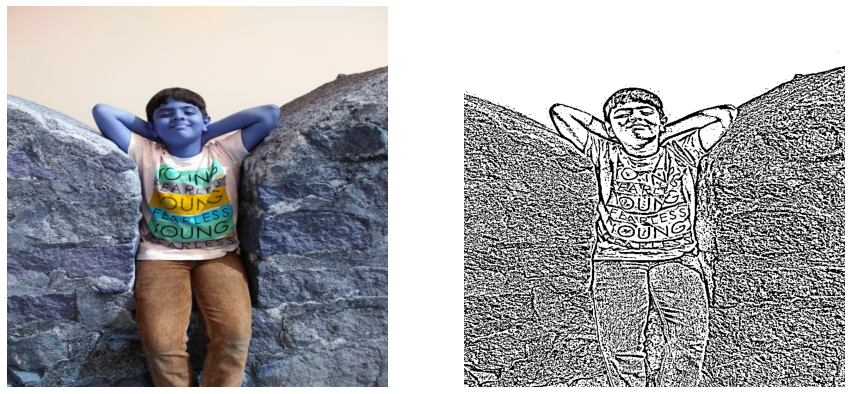

In [6]:
# Load the image
img = cv2.imread('/content/Boy.jpg')

# Resize the image
new_size = (700, 700)
resized_img = cv2.resize(img, new_size)

# Convert to Grayscale image
image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

# Threshold Function
th = cv2.adaptiveThreshold(image, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 11, C = 2)

# Plot the images
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))
plt.show()

### Grabcut Algorithm

GrabCut is  the method to accurately segment the foreground of an image from the background.

In OpenCV, we use cv2.grabcut() function:

    grabCut(img, mask, rect, bgdModel, fgdModel, iterCount[, mode]) and returns a 3 tuple of mask, bgdModel, fgdModel

    In this,

    * img : The input image, which GrabCut assumes to be an 8-bit, 3-channel image.
    * mask : This mask is assumed to be a single-channel image with an unsigned 8-bit integer data type. This mask is initialized automatically if you use bounding box initialization (i.e., cv2.GC_INIT_WITH_RECT); otherwise, GrabCut assumes you are performing mask initialization (cv2.GC_INIT_WITH_MASK).
    * rect : The bounding box rectangle that contains the region that we want to segment. 
    * bgModel : Temporary array used by GrabCut internally when modeling the background.
    * fgModel : Temporary array used by GrabCut when modeling the foreground.
    * iterCount : Number of iterations GrabCut will perform when modeling the foreground versus background. The more iterations, the longer GrabCut will run, and ideally the results will be better.
    * mode : Either cv2.GC_INIT_WITH_RECT or cv2.GC_INIT_WITH_MASK, depending on whether you are initializing GrabCut with a bounding box or a mask, respectively.



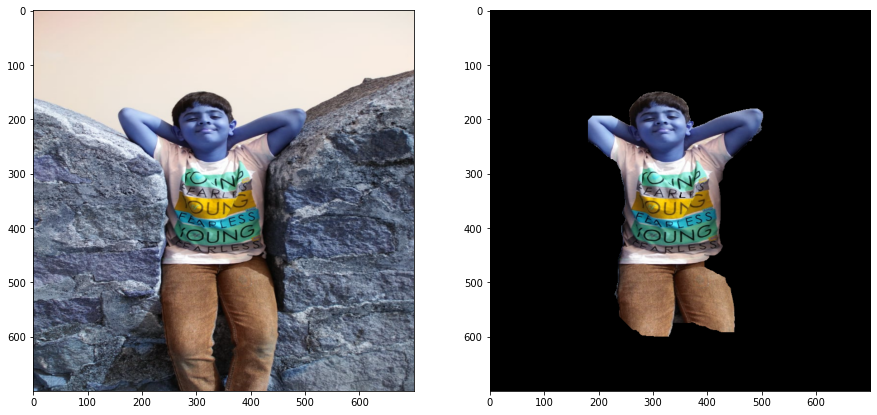

In [7]:
img = cv2.imread('/content/Boy.jpg')
new_size = (700, 700)
resized_img = cv2.resize(img, new_size)

# Create a 0's mask
mask = np.zeros(resized_img.shape[:2],np.uint8)

# Create 2 arrays for background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# Define the bounding box coordinates
rect = (180,150,330,450)

# Apply GrabCut using the the bounding box segmentation method
mask2, bgdModel, fgdModel = cv2.grabCut(resized_img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# If mask2==2 or mask2== 0, mask3 get 0, other wise it gets 1 as 'uint8' type
mask3 = np.where((mask2==2)|(mask2==0),0,1).astype('uint8')

# Scale the mask from the range [0, 1] to [0, 255]
img_seg = resized_img*mask3[:,:,np.newaxis]

# Plot the images
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_seg)
plt.show()


### Please answer the questions below to complete the experiment:

In [8]:
#@title State True or False: OpenCV’s GrabCut implementation returns mask, bgdModel, and fgdModel { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["","True","False"]


In [9]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [10]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [11]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [12]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [13]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [14]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [15]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3892
Date of submission:  25 Oct 2022
Time of submission:  15:53:02
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
